# Predicting video games sales

### Group Members: Advait Jayant, Rasul Rasulov, Ozlem Cuhaci, Lexin Xu, Joseph Perrin  

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [2]:
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

# Set default font size and facecolor
plt.rcParams["font.size"] = 24
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize
figsize(15, 12)



In [3]:
data = pd.read_csv("vgchartz-12_1_2020.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
data = data.rename(columns={"Year_of_Release": "Year", 
                            "NA_Sales": "NA",
                            "EU_Sales": "EU",
                            "JP_Sales": "JP",
                            "Other_Sales": "Other",
                            "Global_Sales": "Global"})
data = data[data["Year"].notnull()]
data = data[data["Genre"].notnull()]
data["Year"] = data["Year"].apply(int)
data["Age"] = 2018 - data["Year"]
data.describe(include="all")

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
count,16448,16448,16448.000000,16448,16416,16448.000000,16448.000000,16448.000000,16448.000000,16448.00000,7983.000000,7983.000000,9840,7463.000000,9907,9769,16448.000000
unique,11429,31,NaN,12,579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1680,8,NaN
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E,NaN
freq,12,2127,NaN,3308,1344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2377,NaN,201,3922,NaN
mean,NaN,NaN,2006.488996,NaN,NaN,0.263965,0.145895,0.078472,0.047583,0.53617,68.994363,26.441313,NaN,163.015141,NaN,NaN,11.511004
std,NaN,NaN,5.877470,NaN,NaN,0.818286,0.506660,0.311064,0.187984,1.55846,13.920060,19.008136,NaN,563.863327,NaN,NaN,5.877470
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.01000,13.000000,3.000000,NaN,4.000000,NaN,NaN,-2.000000
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.06000,60.000000,12.000000,NaN,10.000000,NaN,NaN,8.000000
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.17000,71.000000,22.000000,NaN,24.000000,NaN,NaN,11.000000
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.47000,79.000000,36.000000,NaN,81.000000,NaN,NaN,15.000000


In [5]:
num_years = data["Year"].max() - data["Year"].min() + 1

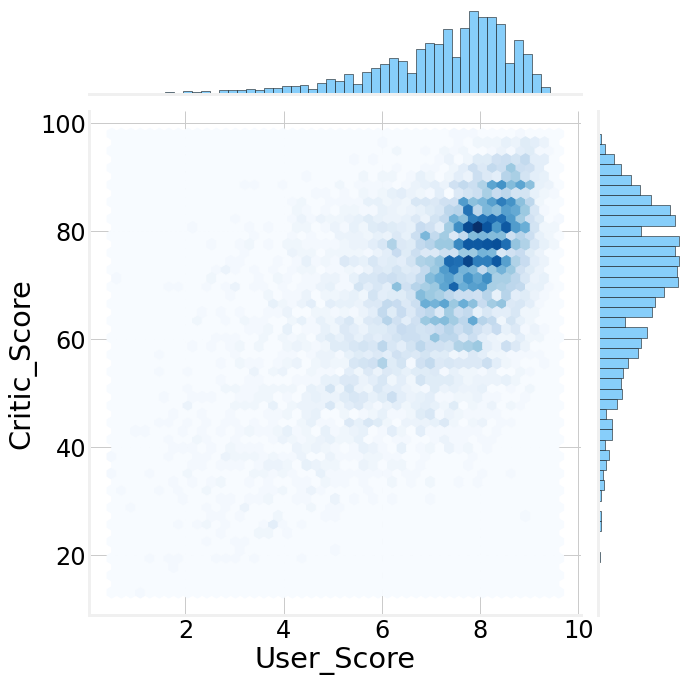

In [6]:
# Replacing "tbd" values with np.nan and transforming column to float type
data["User_Score"] = data["User_Score"].replace("tbd", np.nan).astype(float)

g = sns.jointplot(x="User_Score", y="Critic_Score", data=data, cmap="Blues", kind="hex", 
                  height=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}}, 
                  annot_kws={"loc": 4, "fontsize": 18});
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False);

In [7]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : "Missing Values", 1 : "% of Total Values"})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [8]:
missing_values_table(data)

Your selected dataframe has 17 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
User_Score,8985,54.6
User_Count,8985,54.6
Critic_Score,8465,51.5
Critic_Count,8465,51.5
Rating,6679,40.6
Developer,6541,39.8
Publisher,32,0.2


More than 50% of user and critic scores are missing. In order to successfully predict the sales, we will need to impute the scores variable. 

There exist outliers in the dataset - these outliers indicate the bestselling games, we will remove them for now and add them later.   

In [9]:
# Function by William Koehrsen
# Here an outlier is defined as a value greater than (or lesser than) third quartile (first quartile) 
# plus 3 interquartile ranges (minus 3 interqurtile ranges). 
def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Calculate first and third quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Interquartile range
        iqr = third_quartile - first_quartile

        # Remove outliers
        removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) |
                    (df_out[key] >= (third_quartile + 3 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) &
                    (df_out[key] < (third_quartile + 3 * iqr))]
    return df_out, removed

In [10]:
data, rmvd_global = rm_outliers(data, ["Global"])
data.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,15401.000000,15401.000000,15401.000000,15401.000000,15401.000000,15401.000000,7286.000000,7286.000000,6747.000000,6747.000000,15401.000000
mean,2006.592624,0.144688,0.072628,0.047301,0.024357,0.289258,67.779028,24.518117,7.079976,111.325033,11.407376
std,5.758078,0.210709,0.131408,0.130786,0.050152,0.346918,13.612120,17.194878,1.511031,406.635191,5.758078
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000,-2.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,59.000000,11.000000,6.300000,9.000000,8.000000
50%,2007.000000,0.070000,0.020000,0.000000,0.010000,0.150000,70.000000,20.000000,7.400000,21.000000,11.000000
75%,2010.000000,0.190000,0.080000,0.030000,0.030000,0.380000,78.000000,34.000000,8.200000,61.000000,15.000000
max,2020.000000,1.670000,1.580000,1.650000,1.180000,1.690000,98.000000,106.000000,9.700000,10665.000000,38.000000


We will be building two kinds of models:
- Basic Model: Where we will drop games without a score (critic_score or user_score) and train it on the the remaining data.
               This model will involve minimum feature engineering or feature selection.
- Advanced Model: Where we will impute the missing values and create new features. 

In [11]:
data["Has_Score"] = data["User_Score"].notnull() & data["Critic_Score"].notnull()
rmvd_global["Has_Score"] = rmvd_global["User_Score"].notnull() & rmvd_global["Critic_Score"].notnull()

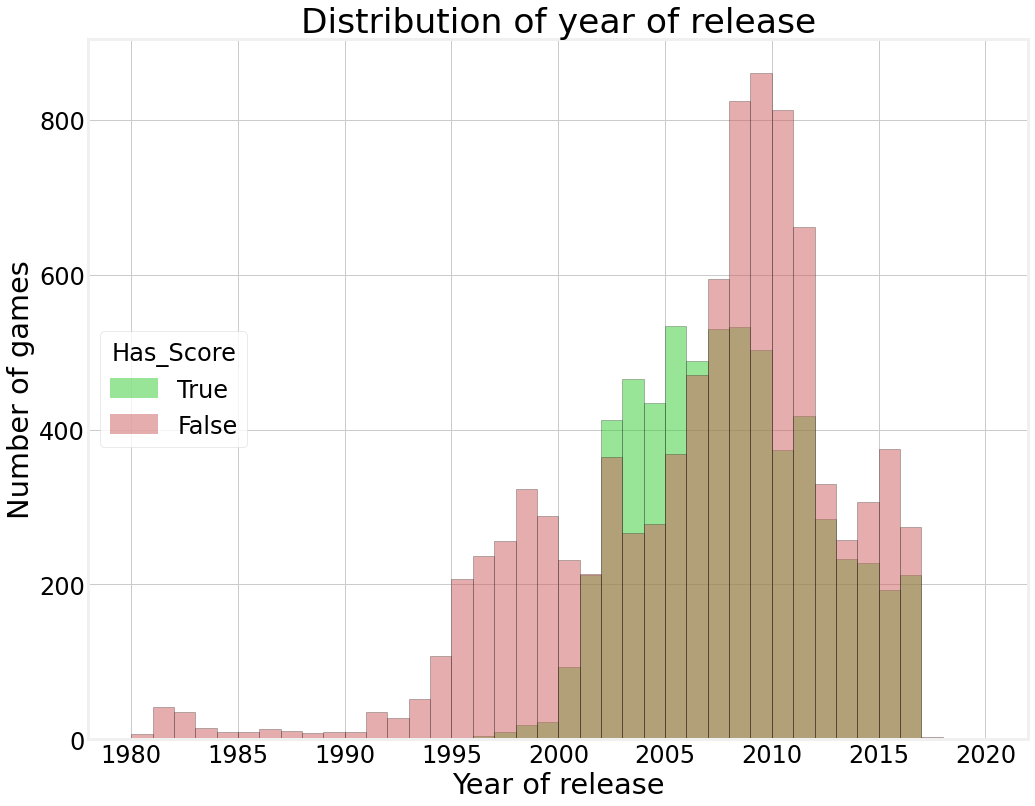

In [12]:
from matplotlib.lines import Line2D
plt.hist(data[data["Has_Score"]==True]["Year"], color="limegreen", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.hist(data[data["Has_Score"]==False]["Year"], color="indianred", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=20, label="True", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=20, label="False", alpha=0.5)],
           title="Has_Score", loc=6);

We observe that games with scores are more evenly spread between 2000 and 2015, with a peak at 2010 for without scores.
In the period 1995-2000, there didn't exist many game rating platforms despite the existence of quite a few video games.

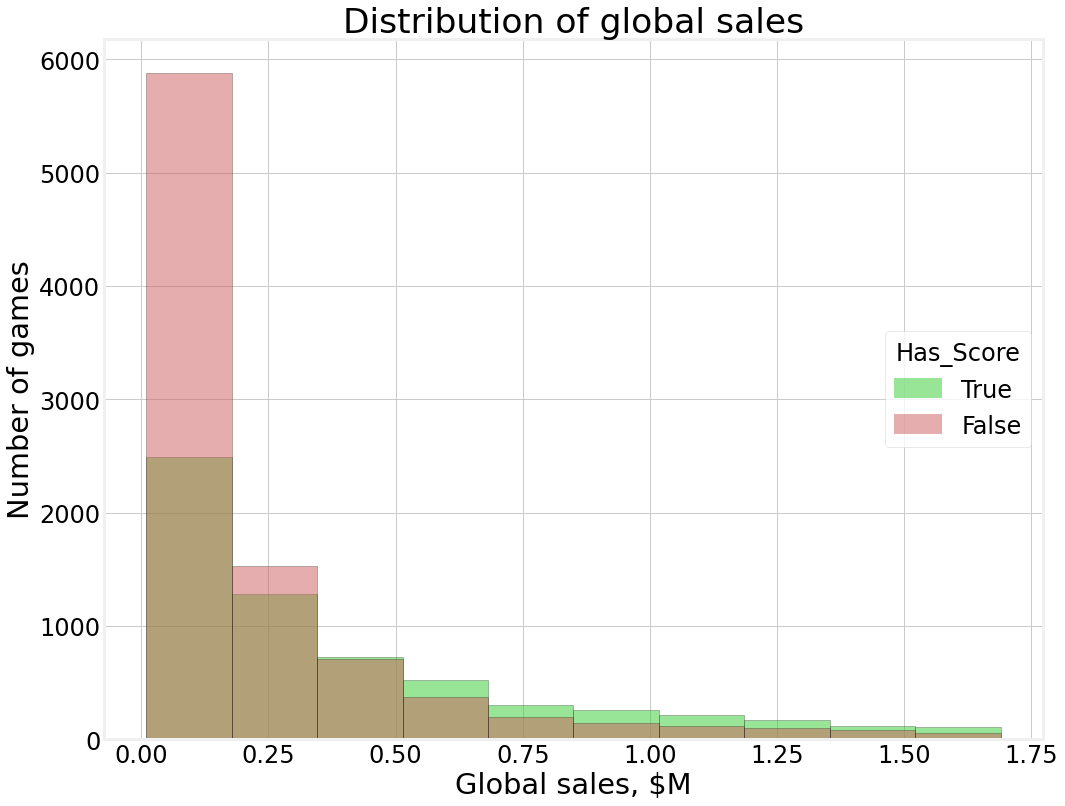

In [13]:
plt.hist(data[data["Has_Score"]==True]["Global"], color="limegreen", alpha=0.5, 
         edgecolor="black")
plt.hist(data[data["Has_Score"]==False]["Global"], color="indianred", alpha=0.5, 
         edgecolor="black")
plt.title("Distribution of global sales")
plt.xlabel("Global sales, $M")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=20, label="True", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=20, label="False", alpha=0.5)],
           title="Has_Score", loc=7);

Those games which haven't been rated tend to have less global sales.

I want to see in what region games were more popular, based on sales.

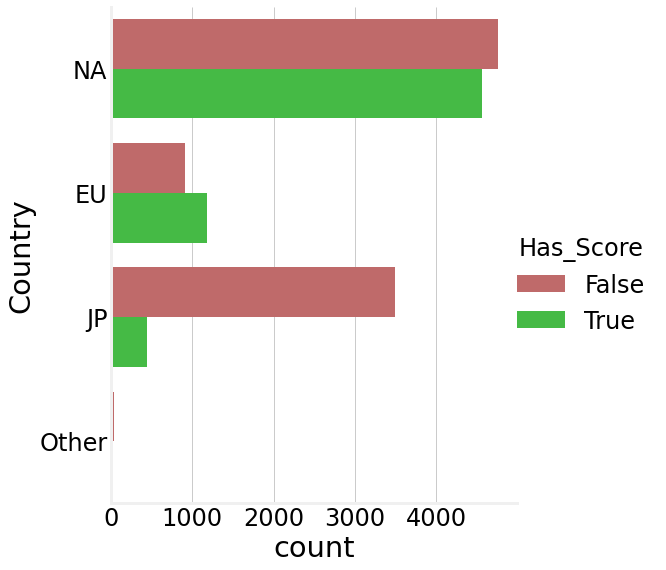

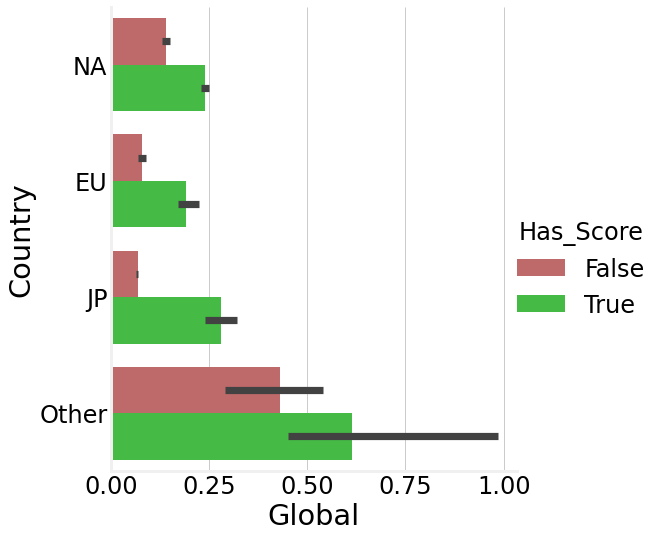

In [14]:
data["Country"] = data[["NA", "EU", "JP", "Other"]].idxmax(1, skipna=True)
palette = {True: "limegreen", False: "indianred"}
sns.catplot(y="Country", hue="Has_Score", data=data, height=8, kind="count", palette=palette)
sns.catplot(y="Country", x="Global", hue="Has_Score", data=data, height=8, kind="bar", palette=palette,
               estimator=lambda x: np.median(x));

While EU and NA have approximately the same number of scored and not scored games, the situation is absolutely different for Japan. Majority of games, that were more popular in Japan than in other regions, do not have a user or critic score. The mean global sales is less for games without score, which confirms what we saw from the histogram above.

## Basic model

For our basic model, we will simply drop those games that don't have a user score, critic score or rating. 

In [15]:
scored = data.dropna(subset=["User_Score", "Critic_Score", "Rating"])
scored.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000,6137.000000
mean,2007.422682,0.209774,0.112472,0.029221,0.039420,0.391119,68.976047,26.910706,7.139661,118.897181,10.577318
std,4.171197,0.231764,0.154954,0.094207,0.059871,0.389871,13.627623,17.416288,1.450253,424.446207,4.171197
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,2.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.010000,0.100000,61.000000,13.000000,6.400000,10.000000,8.000000
50%,2007.000000,0.130000,0.050000,0.000000,0.020000,0.240000,71.000000,23.000000,7.500000,23.000000,11.000000
75%,2010.000000,0.290000,0.150000,0.000000,0.050000,0.560000,79.000000,37.000000,8.200000,66.000000,14.000000
max,2016.000000,1.670000,1.580000,1.390000,1.180000,1.690000,98.000000,106.000000,9.600000,10665.000000,33.000000


We also remove all the outliers in the User Count column. 

In [16]:
scored, rmvd_user_count = rm_outliers(scored, ["User_Count"])
scored.describe()

,Year,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000
mean,2007.055837,0.205403,0.098572,0.028995,0.036368,0.369597,67.815866,24.958439,7.124575,37.459523,10.944163
std,4.010373,0.225580,0.138941,0.095492,0.056428,0.367824,13.408831,15.689528,1.440391,44.572477,4.010373
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.500000,4.000000,2.000000
25%,2004.000000,0.060000,0.010000,0.000000,0.010000,0.100000,60.000000,13.000000,6.400000,9.000000,8.000000
50%,2007.000000,0.130000,0.040000,0.000000,0.020000,0.230000,70.000000,22.000000,7.400000,20.000000,11.000000
75%,2010.000000,0.280000,0.130000,0.000000,0.047500,0.520000,78.000000,34.000000,8.200000,45.000000,14.000000
max,2016.000000,1.670000,1.160000,1.390000,1.130000,1.690000,98.000000,91.000000,9.600000,233.000000,33.000000


In [17]:
scored["Platform"].unique(), scored["Genre"].unique(), scored["Rating"].unique()

(array(['PS2', 'GBA', 'X360', 'PS3', 'PC', 'Wii', 'PSP', 'PS', 'XB', 'GC',
        'DS', 'XOne', '3DS', 'DC', 'PS4', 'WiiU', 'PSV'], dtype=object),
 array(['Shooter', 'Action', 'Role-Playing', 'Racing', 'Simulation',
        'Sports', 'Fighting', 'Platform', 'Misc', 'Strategy', 'Puzzle',
        'Adventure'], dtype=object),
 array(['M', 'E', 'T', 'E10+', 'RP'], dtype=object))

There are 17 unique platfoms, 12 unique genres and 5 ratings in the remaining data. In the advanced model we will try grouping platforms to reduce amount, but for now we will just one-hot encode them. 

Feaures will consist of numeric columns (except for sales in regions and year - using age instead) and one-hot encoded categorical columns (platform, genre, rating).

In [18]:
import category_encoders as ce
# Select the numeric columns
numeric_subset = scored.select_dtypes("number").drop(columns=["NA", "EU", "JP", "Other", "Year"])

# Select the categorical column
categorical_subset = scored[["Platform", "Genre", "Rating"]]

# One hot encode
encoder = ce.one_hot.OneHotEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the score 
correlations = features.corr()["Global"].dropna().sort_values()

Let's look at the highest and lowest correlations with the global sales column. 

In [19]:
correlations.head(5)

Platform_5    -0.186725
Genre_10      -0.094686
Genre_12      -0.084227
Platform_17   -0.069683
Platform_15   -0.062370
Name: Global, dtype: float64

In [20]:
print(categorical_subset)

       Platform_1  Platform_2  Platform_3  Platform_4  Platform_5  Platform_6  Platform_7  Platform_8  Platform_9  Platform_10  Platform_11  Platform_12  Platform_13  Platform_14  Platform_15  Platform_16  Platform_17  Genre_1  Genre_2  Genre_3  Genre_4  Genre_5  Genre_6  Genre_7  Genre_8  Genre_9  Genre_10  Genre_11  Genre_12  Rating_1  Rating_2  Rating_3  Rating_4  Rating_5
1059            1           0           0           0           0           0           0           0           0            0            0            0            0            0            0            0            0        1        0        0        0        0        0        0        0        0         0         0         0         1         0         0         0         0
1065            0           1           0           0           0           0           0           0           0            0            0            0            0            0            0            0            0        0        1       

In [21]:
correlations.tail(5)

User_Score      0.155470
User_Count      0.252651
Critic_Score    0.281545
Critic_Count    0.292327
Global          1.000000
Name: Global, dtype: float64

Lowest correlation is Platform_PC, which seems strange. Highest are critic and user scores and counts. 

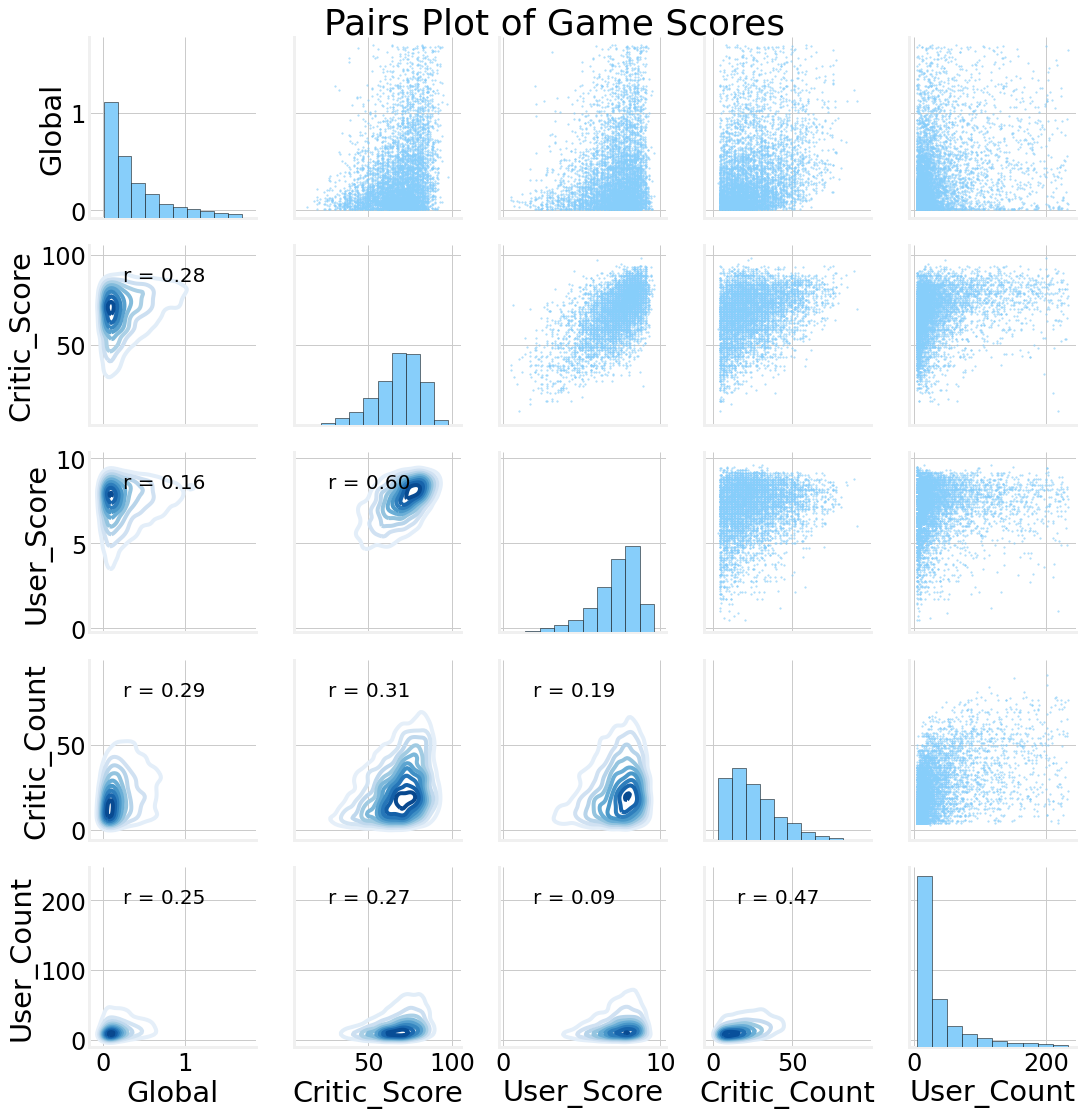

In [22]:
# Extract the columns to  plot
plot_data = features[["Global", "Critic_Score", "User_Score",
                      "Critic_Count", "User_Count"]]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)
    
# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = "lightskyblue", alpha = 0.6, marker=".", s=10)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = "lightskyblue", edgecolor="black")

# Bottom is correlation and density plot
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap = plt.cm.Blues)

# Title for entire plot
plt.suptitle("Pairs Plot of Game Scores", size = 36, y = 1.02);

In [23]:
features.shape

(5534, 40)

There are 39 features (1 is target) in the dataset after feature engineering and selection.

Splitting data into train and test sets.

In [24]:
from sklearn.model_selection import train_test_split
basic_target = pd.Series(features["Global"])
basic_features = features.drop(columns="Global")
features_train, features_test, target_train, target_test = train_test_split(basic_features, basic_target, 
                                                                            test_size=0.2,
                                                                            random_state=42)
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(4427, 39)
(1107, 39)
(4427,)
(1107,)


Defining a function to evaluate our model. We will use mean absolute error. 

In [25]:
def mae(y_true, y_pred):
    return np.average(abs(y_true - y_pred))

For the baseline guess we will use median value of global sales in the train dataset.

In [26]:
baseline_guess = np.median(target_train)
basic_baseline_mae = mae(target_test, baseline_guess)
print("Baseline guess for global sales is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(basic_baseline_mae))

Baseline guess for global sales is: 0.23
Baseline Performance on the test set: MAE = 0.2787


We compare several simple models with different types of regression, and then focus on the best one for hyperparameter tuning.

In [27]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

This is a universal function for training a model and evaluating its performance on test data.

In [28]:
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(features_train, target_train)
    
    # Make predictions and evalute
    model_pred = model.predict(features_test)
    model_mae = mae(target_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [29]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print("Linear Regression Performance on the test set: MAE = {:.04f}".format(lr_mae))

Linear Regression Performance on the test set: MAE = 0.2361


In [30]:
svm = SVR(C = 1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm)

print("Support Vector Machine Regression Performance on the test set: MAE = {:.04f}".format(svm_mae))

Support Vector Machine Regression Performance on the test set: MAE = 0.2859


In [31]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print("Random Forest Regression Performance on the test set: MAE = {:.04f}".format(random_forest_mae))

Random Forest Regression Performance on the test set: MAE = 0.2216


In [32]:
gradient_boosting = GradientBoostingRegressor(random_state=60)
gradient_boosting_mae = fit_and_evaluate(gradient_boosting)

print("Gradient Boosting Regression Performance on the test set: MAE = {:.04f}".format(gradient_boosting_mae))

Gradient Boosting Regression Performance on the test set: MAE = 0.2197


In [33]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(knn_mae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.2556


In [34]:
ridge = Ridge(alpha=10)
ridge_mae = fit_and_evaluate(ridge)

print("Ridge Regression Performance on the test set: MAE = {:.04f}".format(ridge_mae))

Ridge Regression Performance on the test set: MAE = 0.2354


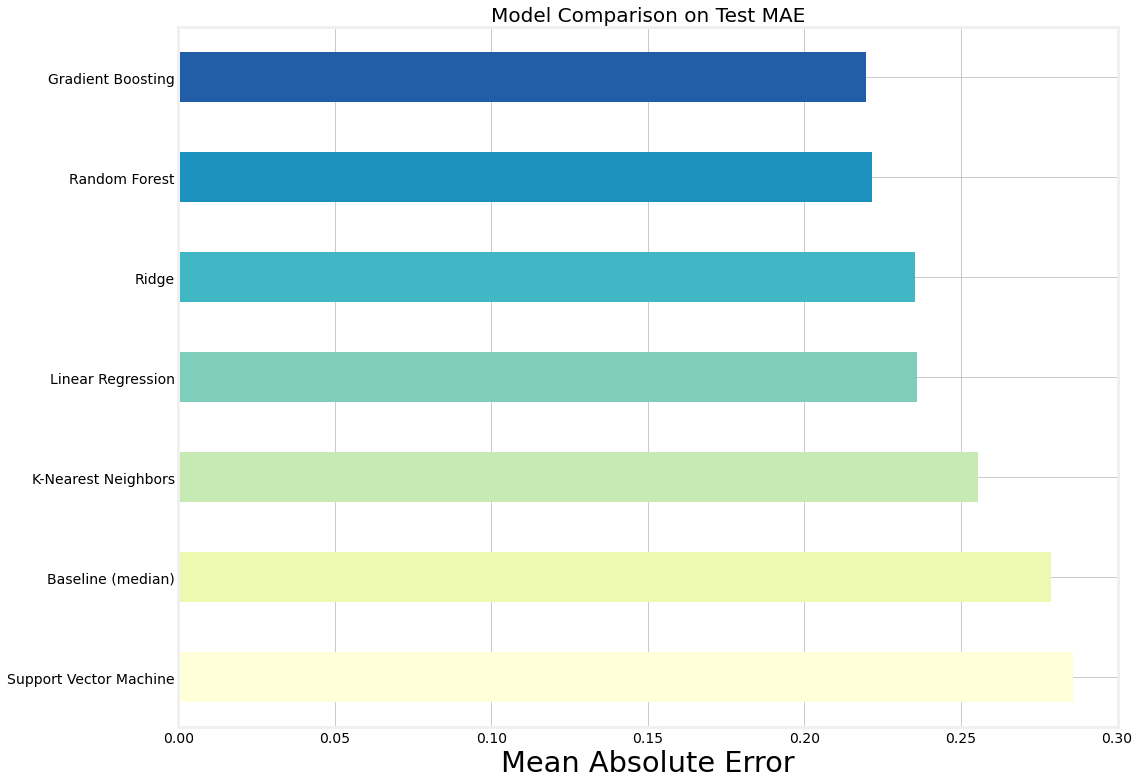

In [35]:
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Baseline (median)", "Ridge"],
                                 "mae": [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosting_mae, knn_mae, basic_baseline_mae, ridge_mae]})

model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                 color = ['#ffffd9', '#edf8b1', '#c7e9b4', '#7fcdbb', '#41b6c4', '#1d91c0', '#225ea8', '#253494', '#081d58',  '#000000'], legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

Gradient boosting regression seems to be the best model.   
Next, we will use randomised search to find the best parameters and then we use grid search for optimizing the n_estimators. 

In [36]:
# Loss function to be optimized
loss = ["ls", "lad", "huber"]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ["auto", "sqrt", "log2", None]

hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

In [37]:
from sklearn.model_selection import RandomizedSearchCV
basic_model = GradientBoostingRegressor(random_state = 42)

random_cv = RandomizedSearchCV(estimator=basic_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)

In [38]:
random_cv.fit(features_train, target_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.0min finished


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

Printing out 10 best estimators found by randomized search.

In [39]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
random_results.head(10)[["mean_test_score", "param_loss",
                         "param_max_depth", "param_min_samples_leaf", "param_min_samples_split",
                         "param_max_features"]]

,mean_test_score,param_loss,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_max_features
0,-0.200985,huber,15,8,6,log2
17,-0.201954,lad,15,2,4,log2
7,-0.202492,huber,5,6,6,auto
16,-0.208397,lad,3,1,10,log2
15,-0.208956,ls,5,4,6,auto
8,-0.210707,lad,2,4,10,auto
19,-0.212971,lad,2,1,10,sqrt
3,-0.213049,lad,2,8,10,sqrt
1,-0.214555,huber,2,2,4,None
2,-0.216843,ls,3,1,4,sqrt


In [40]:
random_cv.best_estimator_

GradientBoostingRegressor(loss='huber', max_depth=15, max_features='log2',
                          min_samples_leaf=8, min_samples_split=6,
                          random_state=42)

Using grid search to find optimal value of the n_estimators parameter.

In [41]:
from sklearn.model_selection import GridSearchCV
trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

basic_model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator=basic_model, param_grid=trees_grid, cv=4, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)

In [42]:
grid_search.fit(features_train, target_train);

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  1.3min finished


We visualise how the number of trees affects the performance.

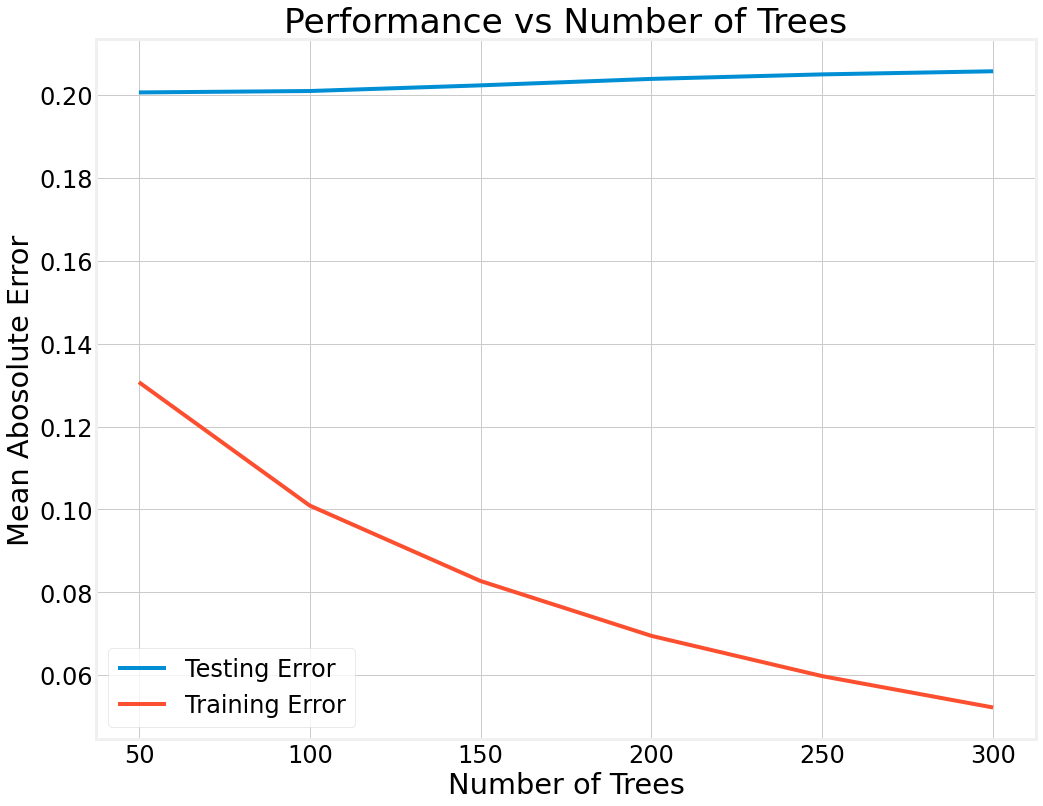

In [43]:
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results["param_n_estimators"], -1 * results["mean_test_score"], label = "Testing Error")
plt.plot(results["param_n_estimators"], -1 * results["mean_train_score"], label = "Training Error")
plt.xlabel("Number of Trees"); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of Trees");

We visualised the results of our grid search to see how the number of trees affects the performance. The graph shows that the model is overfitting. Training error keeps decreasing, while test error stays almost the same. It means that the model learns training examples very well, but cannot generalize on new, unknown data. This is not a very good model, but we  leave it as is, and try to battle overfitting in the advanced model using imputing, feature selection and feature engineering.

Let's lock the final model and see how it performs on test data.

In [44]:
basic_final_model = grid_search.best_estimator_
basic_final_model

GradientBoostingRegressor(loss='huber', max_depth=15, max_features='log2',
                          min_samples_leaf=8, min_samples_split=6,
                          n_estimators=50, random_state=42)

In [45]:
basic_final_pred = basic_final_model.predict(features_test)
basic_final_mae = mae(target_test, basic_final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(basic_final_mae))

Final model performance on the test set: MAE = 0.2086.


MAE dropped, but by a very small margin. Looks like hyperparameter tuning didn't really improve the model. 

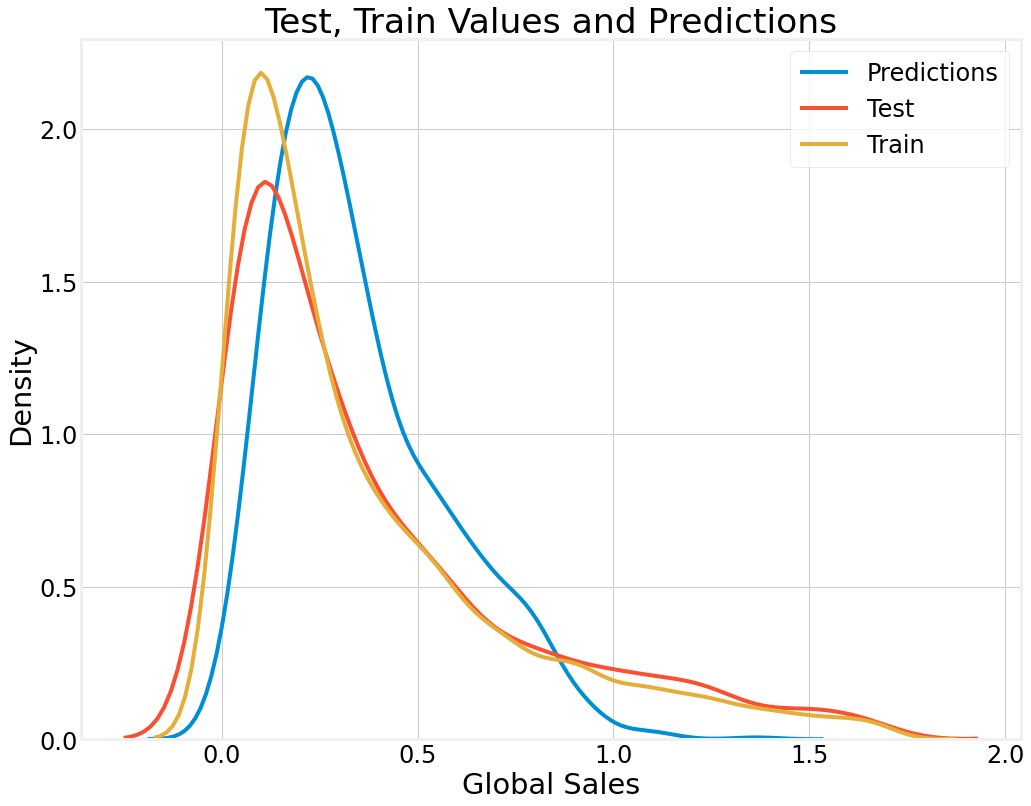

In [46]:
sns.kdeplot(basic_final_pred, label = "Predictions")
sns.kdeplot(target_test, label = "Test")
sns.kdeplot(target_train, label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

Predictions density is moved a little to the right, comparing to densities of initial values. The tail is also different. This might help tuning the model in the future. 

Second graph is a histogram of residuals - differences between real values and predictions. 

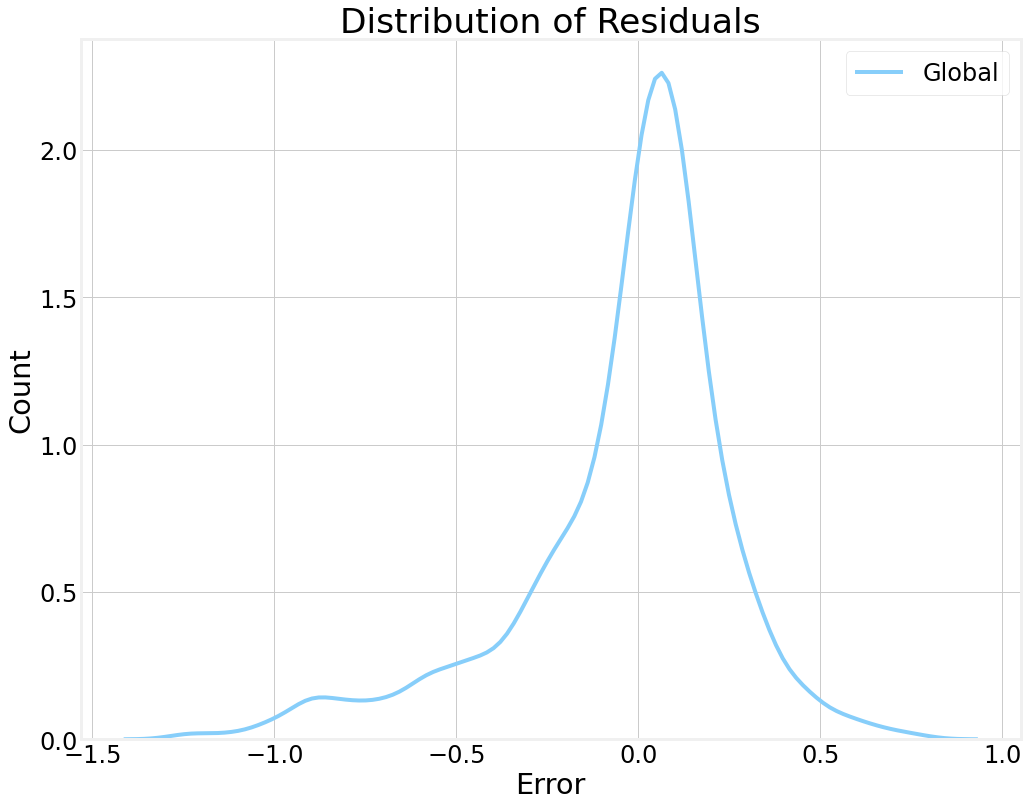

In [47]:
basic_residuals = basic_final_pred - target_test

sns.kdeplot(basic_residuals, color = "lightskyblue")
plt.xlabel("Error"); plt.ylabel("Count")
plt.title("Distribution of Residuals");

## Advanced model

In [48]:
def donut_chart(column, palette="Set2"):
    values = column.value_counts().values
    labels = column.value_counts().index
    plt.pie(values, colors=sns.color_palette(palette), 
            labels=labels, autopct="%1.1f%%", 
            startangle=90, pctdistance=0.85)
    #draw circle
    centre_circle = plt.Circle((0,0), 0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

In [49]:
data["Platform"].unique()

array(['Wii', 'PS2', 'PS3', 'PS', 'N64', 'GBA', 'DS', 'GC', 'X360', 'GB',
       'PC', '3DS', 'PSP', 'XB', 'NES', 'PS4', 'GEN', '2600', 'SNES',
       'XOne', 'WiiU', 'PSV', 'SCD', 'DC', 'SAT', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

There are too many different platforms and most of them represent a very small percent of games. We group platforms such as PS, PS2, PS3, and PS4 into PlatStations to reduce the number of platforms. 

In [50]:
platforms = {"Playstation" : ["PS", "PS2", "PS3", "PS4"],
             "Xbox" : ["XB", "X360", "XOne"], 
             "PC" : ["PC"],
             "Nintendo" : ["Wii", "WiiU"],
             "Portable" : ["GB", "GBA", "GC", "DS", "3DS", "PSP", "PSV"]}

In [51]:
def get_group_label(x, groups=None):
    if groups is None:
        return "Other"
    else:
        for key, val in groups.items():
            if x in val:
                return key
        return "Other"

In [52]:
data["Grouped_Platform"] = data["Platform"].apply(lambda x: get_group_label(x, groups=platforms))

In [53]:
scored["Grouped_Platform"] = scored["Platform"].apply(lambda x: get_group_label(x, platforms))

Almost all games that have scores are for "big" platfroms: PC, PS, Xbox or portable. Let us take a look at the games in other platforms

In [54]:
scored[scored["Grouped_Platform"]=="Other"]

,Name,Platform,Year,Genre,Publisher,NA,EU,JP,Other,Global,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age,Has_Score,Country,Grouped_Platform
1712,Shenmue,DC,1999,Adventure,Sega,0.52,0.24,0.38,0.04,1.18,88.0,9.0,9.4,201.0,Sega AM2,T,19,True,NA,Other
1877,NFL 2K1,DC,2000,Sports,Sega,1.02,0.05,0.00,0.02,1.09,97.0,22.0,6.0,47.0,Visual Concepts,E,18,True,NA,Other
3815,Seaman,DC,1999,Simulation,Sega,0.00,0.00,0.52,0.00,0.52,82.0,24.0,8.4,16.0,Vivarium,T,19,True,JP,Other
5350,SoulCalibur,DC,1999,Fighting,Namco Bandai Games,0.00,0.00,0.34,0.00,0.34,98.0,24.0,8.8,200.0,Namco,T,19,True,JP,Other
7231,Capcom vs. SNK,DC,2000,Fighting,Virgin Interactive,0.00,0.00,0.22,0.00,0.22,80.0,17.0,9.0,24.0,Capcom,T,18,True,JP,Other
7521,Phantasy Star Online,DC,2000,Role-Playing,Sega,0.00,0.00,0.20,0.00,0.20,89.0,21.0,9.1,33.0,Sonic Team,T,18,True,JP,Other
7643,Grandia II,DC,2000,Role-Playing,Ubisoft,0.00,0.00,0.20,0.00,0.20,90.0,17.0,8.8,57.0,Game Arts,T,18,True,JP,Other
7978,Phantasy Star Online Ver. 2,DC,2001,Role-Playing,Sega,0.00,0.00,0.19,0.00,0.19,80.0,10.0,8.9,18.0,Sonic Team,T,17,True,JP,Other
8905,Shenmue II,DC,2001,Adventure,Sega,0.00,0.00,0.15,0.00,0.15,88.0,9.0,9.4,201.0,Sega AM2,T,17,True,JP,Other
9559,Sega GT,DC,2000,Racing,Sega,0.00,0.00,0.13,0.00,0.13,84.0,25.0,7.7,11.0,TOSE,E,18,True,JP,Other


All these games are for "DC" platfom which is Sega Dreamcast, the last of Sega consoles. It was released in 1998 and was the first of sixth generation consoles,  PS2, Gamecube and Xbox. Dreamcast was actually a very good and innovative  product which recieved a lot of positive credit, but it couldn't compete with Sony or Microsoft consoles and Sega was forced to stop the production.

 In 2006 Sega started a new wave of sales of Dreamcast consoles and games, which were restored from the leftovers of first production. Following this, IGN re-launched their IGN Dreamcast section to review these games and compare them with PS3, Xbox 360 and Wii games.

Next we wanted to create some new features: weighted score and our own developer rating. We find percent of all games created by each developer, then calculate cumulative percent starting with developers with the least number of games. Finally, we divide them into 5 groups having a weightage of 20% each. The higher the rank the more the count of developed games

In [55]:
scored["Weighted_Score"] = (scored["User_Score"] * 10 * scored["User_Count"] + 
                            scored["Critic_Score"] * scored["Critic_Count"]) / (scored["User_Count"] + scored["Critic_Count"])
devs = pd.DataFrame({"dev": scored["Developer"].value_counts().index,
                     "count": scored["Developer"].value_counts().values})
m_score = pd.DataFrame({"dev": scored.groupby("Developer")["Weighted_Score"].mean().index,
                        "mean_score": scored.groupby("Developer")["Weighted_Score"].mean().values})
devs = pd.merge(devs, m_score, on="dev")
devs = devs.sort_values(by="count", ascending=True)
devs["percent"] = devs["count"] / devs["count"].sum()
devs["top%"] = devs["percent"].cumsum() * 100
n_groups = 5
devs["top_group"] = (devs["top%"] * n_groups) // 100 + 1
devs["top_group"].iloc[-1] = n_groups
devs

,dev,count,mean_score,percent,top%,top_group
1179,Ntreev Soft,1,73.862069,0.000181,0.018070,1.0
842,Equinoxe,1,49.945946,0.000181,0.036140,1.0
843,Alphadream Corporation,1,77.230769,0.000181,0.054210,1.0
844,Dreamworks Interactive,1,88.933333,0.000181,0.072280,1.0
845,Strangelite,1,55.255319,0.000181,0.090351,1.0
...,...,...,...,...,...,...
4,Konami,78,70.298654,0.014095,92.410553,5.0
3,Ubisoft,86,65.797942,0.015540,93.964583,5.0
2,Capcom,92,74.710656,0.016625,95.627033,5.0
1,EA Sports,116,75.755345,0.020961,97.723166,5.0


A nice graph to see the realtion between developer rank and mean weighted score of developer's games.

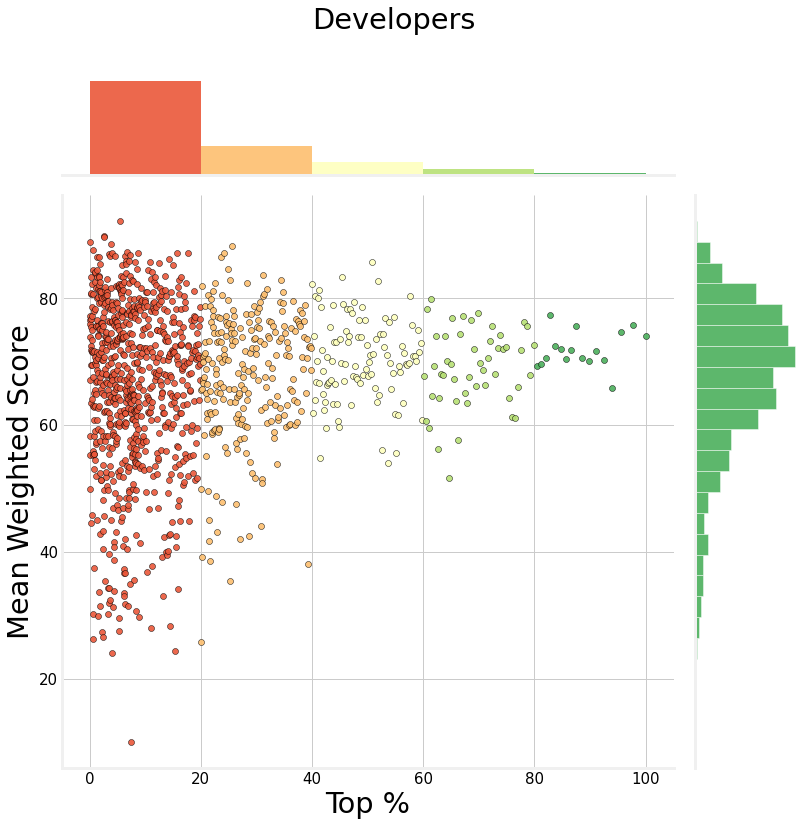

In [56]:
pal = sns.color_palette("RdYlGn", n_groups)
g = sns.JointGrid(x="top%", y="mean_score", data=devs, height=12)
legend_elements = []
for k in range(0, n_groups):
    g.ax_joint.scatter(devs[devs["top_group"]==k+1]["top%"], 
                       devs[devs["top_group"]==k+1]["mean_score"],
                       color=pal[k], alpha=.9, edgecolor="black")
    legend_elements.append(Line2D([0], [0], label=k+1, marker="o", ls="", 
                                  mfc=pal[k], mec=pal[k], alpha=.9, markersize=15))
    g.ax_marg_x.bar(np.arange(k * 100 / n_groups, (k+1) * 100 / n_groups), 
                    devs[devs["top_group"]==k+1].shape[0], 
                    width=1, align="edge", color=pal[k], alpha=.9)
g.ax_marg_y.hist(devs["mean_score"], color=pal[-1], alpha=.9,
                 orientation="horizontal", bins=25, edgecolor="white")
g.set_axis_labels("Top %", "Mean Weighted Score")
g.ax_joint.tick_params(labelsize=15)
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False)
#g.ax_joint.legend(handles=legend_elements, title="Top Group", loc=4)
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Developers");

Before creating and fitting a model we have to fill in missing values. We fill scores and counts with zeros, because there were no real zero scores or counts in the dataset, so it will indicate absence of scores.

In [57]:
data["Critic_Score"].fillna(0.0, inplace=True)
data["Critic_Count"].fillna(0.0, inplace=True)
data["User_Score"].fillna(0.0, inplace=True)
data["User_Count"].fillna(0.0, inplace=True)
data = data.join(devs.set_index("dev")["top_group"], on="Developer")
data = data.rename(columns={"top_group": "Developer_Rank"})
data["Developer_Rank"].fillna(0.0, inplace=True)
data["Rating"].fillna("None", inplace=True)

Removing outliers in User_Count column.

In [58]:
tmp, rmvd_tmp = rm_outliers(data[data["User_Count"] != 0], ["User_Count"])
data.drop(rmvd_tmp.index, axis=0, inplace=True)

Creating Weighted_Score column.

In [59]:
data["Weighted_Score"] = (data["User_Score"] * 10 * data["User_Count"] + 
                            data["Critic_Score"] * data["Critic_Count"]) / (data["User_Count"] + data["Critic_Count"])
data["Weighted_Score"].fillna(0.0, inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14743 entries, 1058 to 16718
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              14743 non-null  object 
 1   Platform          14743 non-null  object 
 2   Year              14743 non-null  int64  
 3   Genre             14743 non-null  object 
 4   Publisher         14712 non-null  object 
 5   NA                14743 non-null  float64
 6   EU                14743 non-null  float64
 7   JP                14743 non-null  float64
 8   Other             14743 non-null  float64
 9   Global            14743 non-null  float64
 10  Critic_Score      14743 non-null  float64
 11  Critic_Count      14743 non-null  float64
 12  User_Score        14743 non-null  float64
 13  User_Count        14743 non-null  float64
 14  Developer         8519 non-null   object 
 15  Rating            14743 non-null  object 
 16  Age               14743 non-null  int

 We use Ordinal encoding for categorical values instead of OneHot. 

In [65]:
import category_encoders as ce
# Select the numeric columns
numeric_subset = data.select_dtypes("number").drop(columns=["NA", "EU", "JP", "Other", "Year"])

# Select the categorical columns
categorical_subset = data[["Grouped_Platform", "Genre", "Rating"]]

# One hot encode
# categorical_subset = pd.get_dummies(categorical_subset)

mapping = []
for cat in categorical_subset.columns:
    tmp = scored.groupby(cat).median()["Weighted_Score"]
    mapping.append({"col": cat, "mapping": [x for x in np.argsort(tmp).items()]})
    
encoder = ce.ordinal.OrdinalEncoder()
categorical_subset = encoder.fit_transform(categorical_subset, mapping=mapping)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features.info()
# Find correlations with the score 
correlations = features.corr()["Global"].dropna().sort_values()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14743 entries, 1058 to 16718
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Global            14743 non-null  float64
 1   Critic_Score      14743 non-null  float64
 2   Critic_Count      14743 non-null  float64
 3   User_Score        14743 non-null  float64
 4   User_Count        14743 non-null  float64
 5   Age               14743 non-null  int64  
 6   Developer_Rank    14743 non-null  float64
 7   Weighted_Score    14743 non-null  float64
 8   Grouped_Platform  14743 non-null  int64  
 9   Genre             14743 non-null  int64  
 10  Rating            14743 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.3 MB


In [66]:
target = pd.Series(features["Global"])
features = features.drop(columns="Global")
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size=0.2,
                                                                            random_state=42)
baseline_guess = np.median(target_train)
baseline_mae = mae(target_test, baseline_guess)
print("Baseline guess for global sales is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(baseline_mae))

Baseline guess for global sales is: 0.14
Baseline Performance on the test set: MAE = 0.2222


In [63]:
model = GradientBoostingRegressor(random_state = 42)

random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)
random_cv.fit(features_train, target_train);

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.6min finished


In [67]:
trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator=model, param_grid=trees_grid, cv=4, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)
grid_search.fit(features_train, target_train);

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.7min finished


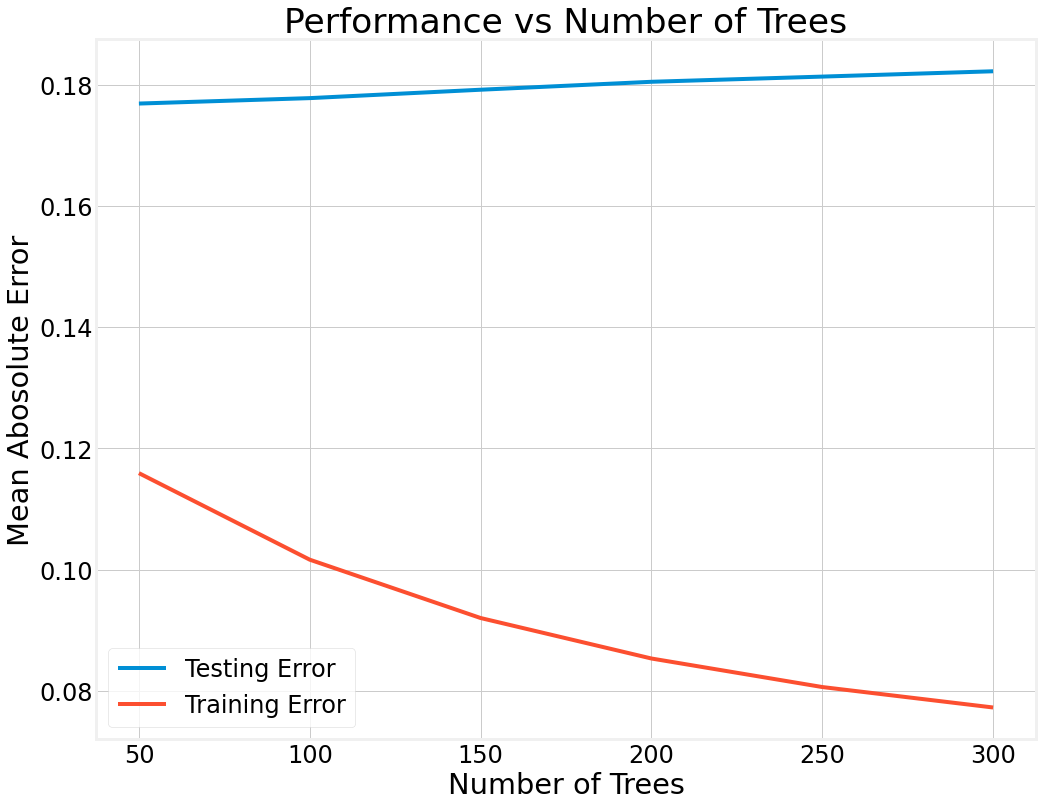

In [68]:
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results["param_n_estimators"], -1 * results["mean_test_score"], label = "Testing Error")
plt.plot(results["param_n_estimators"], -1 * results["mean_train_score"], label = "Training Error")
plt.xlabel("Number of Trees"); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of Trees");

In [69]:
final_model = grid_search.best_estimator_
final_pred = final_model.predict(features_test)
final_mae = mae(target_test, final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(final_mae))

Final model performance on the test set: MAE = 0.1796.


In [70]:
features_test

,Critic_Score,Critic_Count,User_Score,User_Count,Age,Developer_Rank,Weighted_Score,Grouped_Platform,Genre,Rating
14133,0.0,0.0,0.0,0.0,6,0.0,0.000000,4,11,3
5934,70.0,52.0,7.3,57.0,6,1.0,71.568807,2,5,5
5226,72.0,39.0,8.2,33.0,15,1.0,76.583333,2,6,1
6476,67.0,20.0,7.6,16.0,16,4.0,71.000000,4,2,1
1543,76.0,47.0,8.3,136.0,15,1.0,81.202186,2,5,2
...,...,...,...,...,...,...,...,...,...,...
2141,0.0,0.0,0.0,0.0,19,0.0,0.000000,2,7,3
3064,0.0,0.0,7.8,5.0,9,5.0,78.000000,4,1,4
9067,84.0,12.0,8.4,5.0,16,4.0,84.000000,5,1,4
4022,58.0,34.0,7.2,46.0,7,3.0,66.050000,2,4,1


In [71]:
# Selecting all of the grouped platforms for Electronic Arts for a shooting game
features_test1 = [[0.0, 0.0, 0.0, 0.0, 0, 1.0, 0.0, 1, 1, 0], 
                 [0.0, 0.0, 0.0, 0.0, 0, 1.0, 0.0, 2, 1, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 1.0, 0.0, 3, 1, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 1.0, 0.0, 4, 1, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 1.0, 0.0, 5, 1, 0],
# Selecting all of the grouped platforms for Activision for a shooting game
                 [0.0, 0.0, 0.0, 0.0, 0, 2.0, 0.0, 1, 1, 0], 
                 [0.0, 0.0, 0.0, 0.0, 0, 2.0, 0.0, 2, 1, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 2.0, 0.0, 3, 1, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 2.0, 0.0, 4, 1, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 2.0, 0.0, 5, 1, 0],
# Selecting all of the grouped platforms for Ubisoft for a shooting game
                 [0.0, 0.0, 0.0, 0.0, 0, 3.0, 0.0, 1, 1, 0], 
                 [0.0, 0.0, 0.0, 0.0, 0, 3.0, 0.0, 2, 1, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 3.0, 0.0, 3, 1, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 3.0, 0.0, 4, 1, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 3.0, 0.0, 5, 1, 0],]


ynew = final_model.predict(features_test1)
print("X=%s, Predicted=%s" % (features_test1[0], ynew[0]))
print("X=%s, Predicted=%s" % (features_test1[1], ynew[1]))

predicted_sum1 = 0
for i in range(5):
    predicted_sum1 += ynew[i]
    
predicted_sum2 = 0
for i in range(5, 10):
    predicted_sum2 += ynew[i]
    
predicted_sum3 = 0
for i in range(10, 15):
    predicted_sum3 += ynew[i]
    
print("\n\n\nShooter: ")
print("Electronic Arts: " + str(predicted_sum1))
print("Activision: " + str(predicted_sum2))
print("Ubisoft: " + str(predicted_sum3))


# Selecting all of the grouped platforms for Electronic Arts for an action game
features_test2 = [[0.0, 0.0, 0.0, 0.0, 0, 1.0, 0.0, 1, 2, 0], 
                 [0.0, 0.0, 0.0, 0.0, 0, 1.0, 0.0, 2, 2, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 1.0, 0.0, 3, 2, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 1.0, 0.0, 4, 2, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 1.0, 0.0, 5, 2, 0],
# Selecting all of the grouped platforms for Activision for an action game
                 [0.0, 0.0, 0.0, 0.0, 0, 2.0, 0.0, 1, 2, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 2.0, 0.0, 2, 2, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 2.0, 0.0, 3, 2, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 2.0, 0.0, 4, 2, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 2.0, 0.0, 5, 2, 0],
# Selecting all of the grouped platforms for Ubisoft for an action game
                 [0.0, 0.0, 0.0, 0.0, 0, 3.0, 0.0, 1, 2, 0], 
                 [0.0, 0.0, 0.0, 0.0, 0, 3.0, 0.0, 2, 2, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 3.0, 0.0, 3, 2, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 3.0, 0.0, 4, 2, 0],
                 [0.0, 0.0, 0.0, 0.0, 0, 3.0, 0.0, 5, 2, 0],]


ynew2 = final_model.predict(features_test2)
predicted_sum4 = 0
for i in range(5):
    predicted_sum4 += ynew2[i]
    
predicted_sum5 = 0
for i in range(5, 10):
    predicted_sum5 += ynew2[i]
    
predicted_sum6 = 0
for i in range(10, 15):
    predicted_sum6 += ynew2[i]

print("\n\n\nAction: ")
print("Electronic Arts: " + str(predicted_sum4))
print("Activision: " + str(predicted_sum5))
print("Ubisoft: " + str(predicted_sum6))


X=[0.0, 0.0, 0.0, 0.0, 0, 1.0, 0.0, 1, 1, 0], Predicted=0.13273529234255782
X=[0.0, 0.0, 0.0, 0.0, 0, 1.0, 0.0, 2, 1, 0], Predicted=0.08541155033799212



Shooter: 
Electronic Arts: 0.5188980950891323
Activision: 0.5642465546681967
Ubisoft: 0.5907425972930588



Action: 
Electronic Arts: 0.3312369843277563
Activision: 0.36124339880992185
Ubisoft: 0.4116727330318693


"Advanced" model gives better results (lower error on test set) which is a good achievement, but the model is still overfitting (graph above). There is definitely room for improvement. 

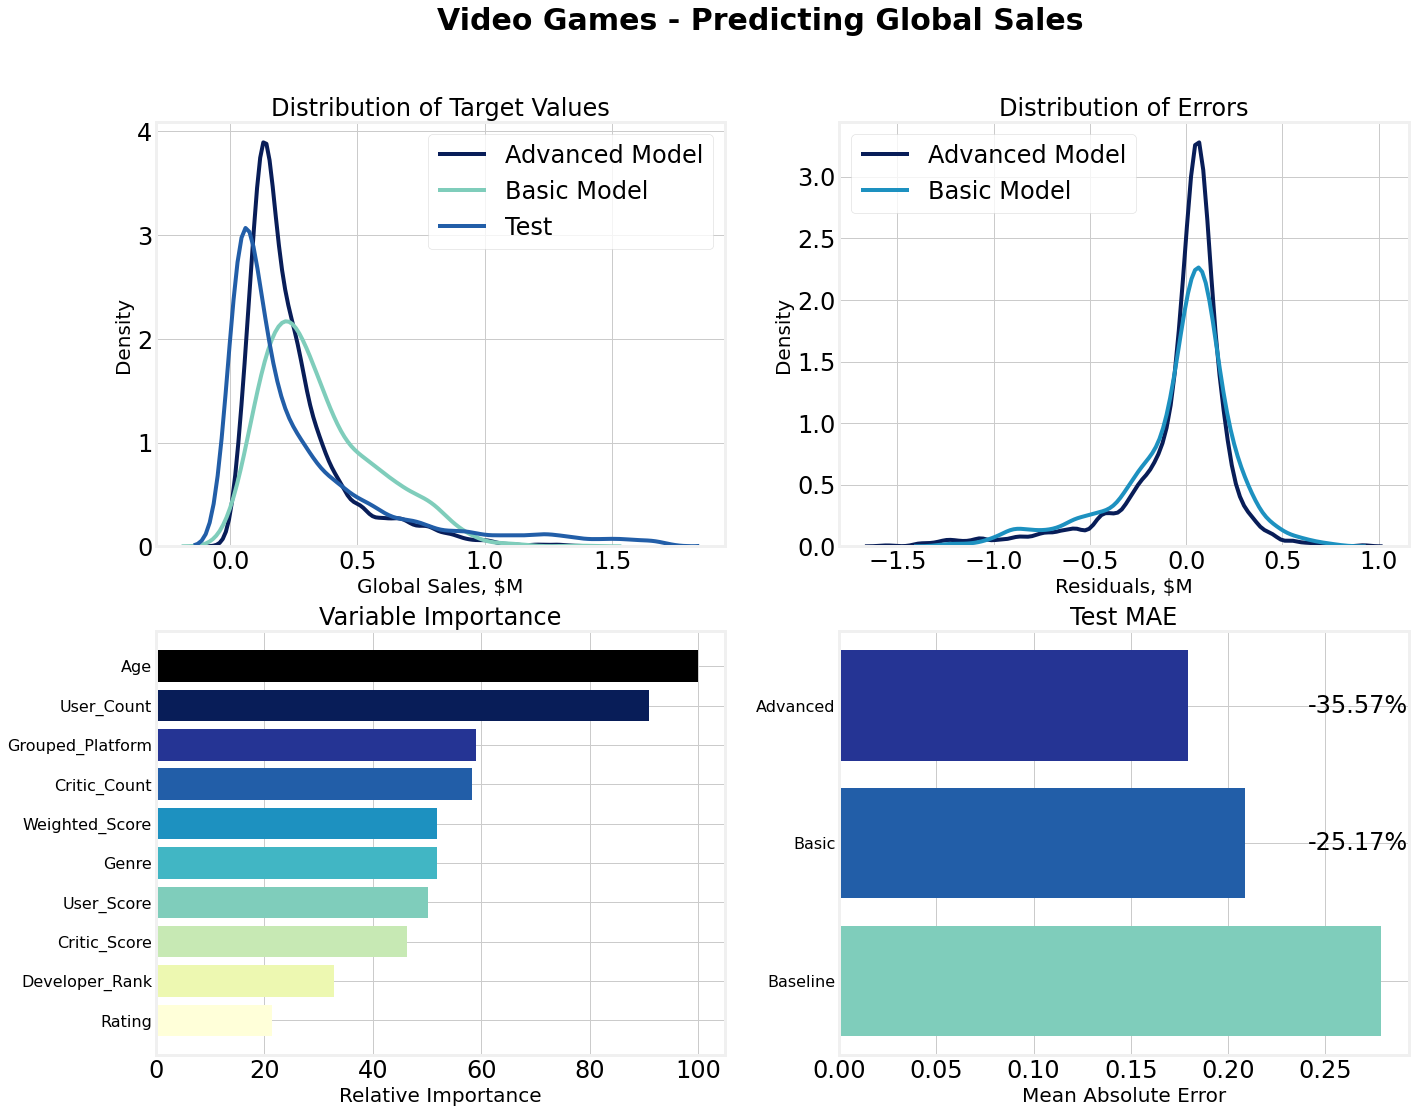

In [72]:
import matplotlib.gridspec as gridspec
figsize(20, 16)

fig = plt.figure()
gs = gridspec.GridSpec(2, 2)
# c('#253494', '#c7e9b4', '#081d58', '#7fcdbb', '#ffffd5', '#41b6c4', '#ffffd9', '#1d91c0', '#225ea8', '#edf8b1')
plt.suptitle("Video Games - Predicting Global Sales", size=30, weight="bold");
my_colours = ['#ffffd9', '#edf8b1', '#c7e9b4', '#7fcdbb', '#41b6c4', '#1d91c0', '#225ea8', '#253494', '#081d58',  '#000000']

ax = fig.add_subplot(gs[0, 0])
plt.sca(ax)
sns.kdeplot(final_pred, color="#081d58", label="Advanced Model")
sns.kdeplot(basic_final_pred, color="#7fcdbb", label="Basic Model")
sns.kdeplot(target_test, color="#225ea8", label="Test")
plt.xlabel("Global Sales, $M", size=20); plt.ylabel("Density", size=20);
plt.title("Distribution of Target Values", size=24);

residuals = final_pred - target_test
ax = fig.add_subplot(gs[0, 1])
plt.sca(ax)
sns.kdeplot(residuals, color = "#081d58", label="Advanced Model")
sns.kdeplot(basic_residuals, color="#1d91c0", label="Basic Model")
plt.xlabel("Residuals, $M", size=20);plt.ylabel("Density", size=20);
plt.title("Distribution of Errors", size=24);

feature_importance = final_model.feature_importances_
feature_names = features.columns.tolist()
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
ax = fig.add_subplot(gs[1, 0])
plt.sca(ax)
plt.barh(pos, feature_importance[sorted_idx], align='center', color=my_colours)
plt.yticks(pos, [feature_names[x] for x in sorted_idx], size=16)
plt.xlabel('Relative Importance', size=20)
plt.title('Variable Importance', size=24);

model_comparison = pd.DataFrame({"model": ["Baseline", "Basic", "Advanced"],
                                 "mae": [basic_baseline_mae, basic_final_mae, final_mae],
                                 "diff": ["0.00%", "-{:.2f}%".format((1 - basic_final_mae / basic_baseline_mae) * 100), "-{:.2f}%".format((1 - final_mae / basic_baseline_mae) * 100)],
                                 "color": ['#253494', '#c7e9b4', '#081d58']})
model_comparison.sort_values("mae", ascending=False)
pos = np.arange(3) + .5
ax = fig.add_subplot(gs[1, 1])
plt.sca(ax)
plt.barh(pos, model_comparison["mae"], align="center", color=['#7fcdbb', '#225ea8', '#253494'])
for i in [1, 2]:
    plt.text(plt.xlim()[1], pos[i], model_comparison["diff"][i], 
             verticalalignment="center", horizontalalignment="right")
plt.yticks(pos, model_comparison["model"], size=16); plt.xlabel("Mean Absolute Error", size=20);
plt.title("Test MAE", size=24);